# Data Cleaning

Datasets are available here: https://drive.google.com/open?id=1A-Y55qgJMB0L-xzeMqmpmzYBPzfP3Vi2 

In [1]:
import pandas as pd
import numpy as np
import os

## Get List of Files

In [ ]:
PATH = 'python-notebooks-data-wrangling/data/financial/raw/companies'
files_to_read = os.listdir(PATH) #pulls in list of all file names in directory
company_names = [i.split('.')[0] for i in files_to_read]
print('example file: ', files_to_read[0], 'company: ', company_names[0])

## Read in first file

In [ ]:
df = pd.read_csv(os.path.join(PATH,files_to_read[0]))
df['company'] = company_names[0]
df.head()

In [ ]:
df.shape

## Read in second file to demonstrate concatenation

In [ ]:
df2 = pd.read_csv(os.path.join(PATH, files_to_read[1]))
df2['company'] = company_names[1]

In [ ]:
df2.shape

In [ ]:
df3 = pd.concat([df, df2])
df3.head()

In [ ]:
df3.tail()

In [ ]:
df3.shape

In [ ]:
df3.shape[0] == df.shape[0] + df2.shape[0]

## Read in rest of the files and append

In [ ]:
for name, file in zip(company_names[1:], files_to_read[1:]):
    print('reading: ', name)
    new_df = pd.read_csv(os.path.join(PATH,file))
    new_df['company'] = name
    df = pd.concat([df, new_df])

In [ ]:
df.shape

In [ ]:
df.info()

## Group  By 

You can group data and work with grouped data, similar to how you would in SQL

In [ ]:
grouped = df.groupby('company')
grouped.get_group('AAPL')

In [ ]:
grouped.head() #gives head for each first 5 of each company

In [ ]:
grouped['Volume'].sum()

## Hit "Tab" after the dot to see additional attributes

In [ ]:
grouped.

## You  can apply multiple aggregations at once

In [ ]:
grouped['Volume'].agg(['sum','mean']).head() #.agg allows for different aggregations, which are passed as strings

## You can apply different functions to different columns using a dictionary

In [ ]:
grouped.agg({'Volume' : 'sum', 'Close' : 'mean'}).head()

# Excercise: 

 - Create a new variable "grouped2" where you group our  original dataframe by company.

 - Then choose a column or two and perform several aggregations on it

In [ ]:
grouped2 = df.groupby('company')

In [ ]:
grouped2['High', 'Low', 'Close'].agg(['min','max', 'mean']).head()

## Use "Transform" to modify observations within groups

First we will randomly  create "NA" values in the 'Close" column and then we will set those NA values to the mean within each group

In [ ]:
# df.loc['row_filter', 'select columns']

In [ ]:
df.loc[df['High']>50, ['Close', 'Company']].head()

In [ ]:
df.loc[np.random.choice(df.index, size = 2000), 'Close'] = np.nan

In [ ]:
df.info()

In [ ]:
df.loc[df['Close'].isnull(),['company','Close']]

In [ ]:
len(df.loc[df['Close'].isnull(),['company','Close']])

In [ ]:
## Define the functiont to use for transform
def get_mean(x):
    return x.fillna(x.mean())

grouped = df.groupby('company')

transformed = grouped.transform(get_mean) 

#transform, you always pass a funtion and it gets applied to the variable "grouped" in this case

#this is instead of writing the loop below

#for group in grouped:
#   group = get_mean(group)

In [ ]:
transformed.info()

# Excercise: 

 - Create a function and perform a transformation on your grouped data

## A pivot works just like excel

In [ ]:
pivoted = df.pivot(index = 'Date', columns='company', values = 'Close')

In [ ]:
pivoted.tail()

## Check out the nulls

In [ ]:
pivoted.info()

In [ ]:
pivoted.isnull().sum()

## Look at the nulls directly

In [ ]:
pivoted.isna()
#list(pivoted.isna()==False)

## Nans are just ignored when we do arithmetic calculations

In [ ]:
pivoted.mean()

## We can fill those in with 0's if we want

In [ ]:
pivoted.fillna(0)
pivoted.head()

# Excercise:

Fill in the nulls with another value

In [ ]:
#pivoted.fillna(pivoted.mean(), inplace=True)
pivoted.head()

## Have to add the 'in place = True' 

In [ ]:
#pivoted.fillna(0, inplace=True)
pivoted.head()

# Time Series and Indexing

Pandas has many time series functions you can do 

In [ ]:
pivoted.index.dtype

In [ ]:
pivoted.index = pd.to_datetime(pivoted.index)

In [ ]:
pivoted.index

In [ ]:
pivoted.index.dtype

In [ ]:
pivoted['month'] = pivoted.index.month

In [ ]:
pivoted.groupby(['month']).mean()

In [ ]:
pivoted['year'] = pivoted.index.year

In [ ]:
pivoted.groupby(['year','month']).mean().tail()

In [ ]:
pivoted.dropna(inplace=True)

In [ ]:
pivoted.pct_change()

In [ ]:
pivoted.resample('M').mean().head() #gives the avg. by month
pivoted.resample('W').mean().head() #gives the avg. by week
pivoted.resample('M').last().head() #gives the last value by month

## Excercise

Answer the following question: 
    
    Which month does Apple stock have the highest average monthly return?  Which month has the lowest? 
    
    
    

In [ ]:
pivoted.groupby(['month']).mean().pct_change()['AAPL'].sort_values()*100

# Pipes

In [ ]:
def monthly_avg(df):
    return df.resample('m').mean()

def pct_change(df):
    return df.pct_change()

def rolling_mean(df, period):
    return df.rolling(window = period).mean() #rolling function in pandas

def dropna(df):
    return df.dropna()

rolling_3m = (pivoted.pipe(dropna)
              .pipe(monthly_avg)
              .pipe(pct_change)
              .pipe(rolling_mean, period = 3))

In [ ]:
rolling_3m

## Save some Memory

In [ ]:
del(df)
del(pivoted)

## Load in a New dataset

In [ ]:
#nyc dept of buildings application dataset

In [2]:
df = pd.read_csv('DOB_job_filings.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,7,22,39,61,69,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(200000, 97)

## Look at the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 97 columns):
Unnamed: 0                       200000 non-null int64
Job #                            200000 non-null int64
Doc #                            200000 non-null int64
Borough                          200000 non-null object
House #                          200000 non-null object
Street Name                      200000 non-null object
Block                            199419 non-null object
Lot                              199419 non-null object
Bin #                            200000 non-null int64
Job Type                         200000 non-null object
Job Status                       200000 non-null object
Job Status Descrp                200000 non-null object
Latest Action Date               200000 non-null object
Building Type                    200000 non-null object
Community - Board                199855 non-null float64
Cluster                          59734 non-null obje

## Some of those datatypes will cause  a problem for plotting

In [5]:
df.dtypes

Unnamed: 0                         int64
Job #                              int64
Doc #                              int64
Borough                           object
House #                           object
Street Name                       object
Block                             object
Lot                               object
Bin #                              int64
Job Type                          object
Job Status                        object
Job Status Descrp                 object
Latest Action Date                object
Building Type                     object
Community - Board                float64
Cluster                           object
Landmarked                        object
Adult Estab                       object
Loft Board                        object
City Owned                        object
Little e                          object
PC Filed                          object
eFiling Filed                     object
Plumbing                          object
Mechanical      

## Lets look at the Initial Cost and Total Estimated Fee Columns

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df[['Initial Cost', 'Total Est. Fee']].head()

,Initial Cost,Total Est. Fee
0,$0.00,$0.00
1,$19194.00,$389.50
2,$0.00,$200.00
3,$0.00,$334340.34
4,$0.00,$624.20


## Convert the 'Initial Cost and Total Est. Fee' columns to float

In [7]:
df['Initial Cost'] = df['Initial Cost'].str.replace('$','').astype('float')
df['Total Est. Fee'] = df['Total Est. Fee'].str.replace("$", '').astype('float')

## Look at the Borough Column

In [8]:
df['Borough'].value_counts(dropna=False)

BROOKLYN         72853
QUEENS           47902
MANHATTAN        41527
STATEN ISLAND    20247
BRONX            17471
Name: Borough, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

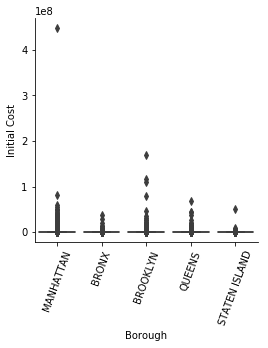

In [9]:
sns.factorplot(kind='box', x='Borough', y='Initial Cost', data=df)
plt.xticks(rotation = 70)

## Look at the scatter plot of Initial cost vs Total Estimated.  What do those 0's represent

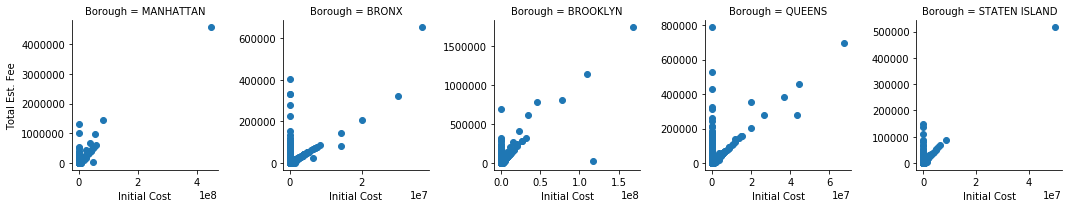

In [10]:
def show_scatter():
    g = sns.FacetGrid(df, col='Borough', sharex=False, sharey=False)
    g.map(plt.scatter, 'Initial Cost', 'Total Est. Fee')
show_scatter()

In [ ]:
#there are a lot of values at x=0, perhaps that is all the nan values, hypothesis

In [11]:
cols = ['Initial Cost', 'Total Est. Fee', 'Job Type', 'Job Status', 'Job Status Descrp','Latest Action Date']
df.loc[df['Initial Cost']==0,cols].head()

,Initial Cost,Total Est. Fee,Job Type,Job Status,Job Status Descrp,Latest Action Date
0,0.0,0.00,A1,X,SIGNED OFF,04/09/2018
2,0.0,200.00,PA,P,PLAN EXAM - APPROVED,05/23/2013
3,0.0,334340.34,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,04/09/2018
4,0.0,624.20,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,04/09/2018
5,0.0,0.00,A1,R,PERMIT ISSUED - ENTIRE JOB/WORK,02/12/2013


In [12]:
df.loc[df['Initial Cost']==0,].describe()

,Unnamed: 0,Job #,Doc #,Bin #,Community - Board,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,...,Existing Dwelling Units,JOB_S1_NO,TOTAL_CONSTRUCTION_FLOOR_AREA,WITHDRAWAL_FLAG,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN
count,130078.000000,1.300780e+05,130078.000000,1.300780e+05,129972.000000,130078.0,1.300780e+05,130078.000000,1.300780e+05,130078.000000,...,7507.000000,1.300780e+05,1.300780e+05,130078.000000,130078.000000,129189.000000,129189.000000,129189.000000,129189.000000,1.255680e+05
mean,99381.405065,3.269511e+08,1.189294,3.461519e+06,328.392862,0.0,1.148237e+03,1.716263,1.256450e+03,0.003621,...,42.967231,1.303777e+06,4.119500e+03,0.009648,0.013992,40.696285,-73.933569,29.590987,9076.212379,3.405482e+06
std,50942.741395,1.180307e+08,0.625226,1.278044e+06,119.899065,0.0,9.533333e+03,128.306072,3.505342e+04,1.289369,...,223.064654,5.840983e+05,3.421940e+04,0.113879,0.454724,0.085297,0.112128,14.864261,25425.124961,1.266861e+06
min,0.000000,1.015899e+08,1.000000,1.000005e+06,2.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,1.915230e+05,0.000000e+00,0.000000,0.000000,40.498628,-74.254375,1.000000,1.000000,1.000000e+06
25%,59887.250000,3.010686e+08,1.000000,3.016118e+06,301.000000,0.0,1.600000e+02,0.000000,0.000000e+00,0.000000,...,1.000000,9.523252e+05,0.000000e+00,0.000000,0.000000,40.630500,-73.987976,19.000000,167.000000,3.000000e+06
50%,93565.500000,3.100245e+08,1.000000,3.395862e+06,315.000000,0.0,2.751600e+02,0.000000,0.000000e+00,0.000000,...,2.000000,1.241368e+06,0.000000e+00,0.000000,0.000000,40.694011,-73.933112,31.000000,411.000000,3.392692e+06
75%,145800.750000,4.023753e+08,1.000000,4.532066e+06,411.000000,0.0,5.361200e+02,0.000000,0.000000e+00,0.000000,...,13.000000,1.445699e+06,2.782000e+03,0.000000,0.000000,40.755114,-73.852704,42.000000,1113.000000,4.529715e+06
max,199999.000000,5.401473e+08,10.000000,5.866470e+06,609.000000,0.0,1.311624e+06,29600.000000,4.993437e+06,465.000000,...,8018.000000,2.950819e+06,3.896458e+06,6.000000,33.000000,40.911954,-73.700736,51.000000,157903.000000,5.861998e+06


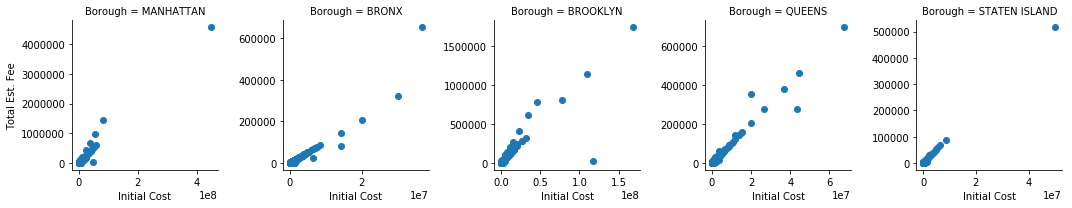

In [13]:
import numpy as np
df.loc[df['Initial Cost']==0, 'Initial Cost'] = np.nan
show_scatter()

In [ ]:
#this removed the zero's that were due to nans

## Lets compare regression outputs

In [14]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('.', '')

In [15]:
df.columns

Index(['Unnamed:_0', 'Job_#', 'Doc_#', 'Borough', 'House_#', 'Street_Name',
       'Block', 'Lot', 'Bin_#', 'Job_Type', 'Job_Status', 'Job_Status_Descrp',
       'Latest_Action_Date', 'Building_Type', 'Community_-_Board', 'Cluster',
       'Landmarked', 'Adult_Estab', 'Loft_Board', 'City_Owned', 'Little_e',
       'PC_Filed', 'eFiling_Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel_Burning', 'Fuel_Storage', 'Standpipe', 'Sprinkler', 'Fire_Alarm',
       'Equipment', 'Fire_Suppression', 'Curb_Cut', 'Other',
       'Other_Description', 'Applicant's_First_Name', 'Applicant's_Last_Name',
       'Applicant_Professional_Title', 'Applicant_License_#',
       'Professional_Cert', 'Pre-_Filing_Date', 'Paid', 'Fully_Paid',
       'Assigned', 'Approved', 'Fully_Permitted', 'Initial_Cost',
       'Total_Est_Fee', 'Fee_Status', 'Existing_Zoning_Sqft',
       'Proposed_Zoning_Sqft', 'Horizontal_Enlrgmt', 'Vertical_Enlrgmt',
       'Enlargement_SQ_Footage', 'Street_Frontage', 'ExistingNo_of_

In [16]:
import statsmodels.formula.api as smf

def regress(df, borough):
    return (borough, smf.ols('Total_Est_Fee ~ Initial_Cost', data = df, missing='drop').fit())


separate_regressions = [i for i in df.groupby('Borough')
                        .apply(lambda x: regress(x, x['Borough'].unique()))]

#the above skips the below
#for group in df.groupby('Borough'):
#    regress(group)

In [17]:
separate_regressions

[(array(['BRONX'], dtype=object),
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x10931eb00>),
 (array(['BROOKLYN'], dtype=object),
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x109422518>),
 (array(['MANHATTAN'], dtype=object),
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x109304d30>),
 (array(['QUEENS'], dtype=object),
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x109422c18>),
 (array(['STATEN ISLAND'], dtype=object),
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x10f97e630>)]

In [18]:
for i in separate_regressions:
    print(i[0])
    print(i[1].summary())

['BRONX']
                            OLS Regression Results                            
Dep. Variable:          Total_Est_Fee   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 3.575e+04
Date:                Wed, 23 May 2018   Prob (F-statistic):               0.00
Time:                        20:10:56   Log-Likelihood:                -33004.
No. Observations:                3374   AIC:                         6.601e+04
Df Residuals:                    3372   BIC:                         6.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -329.1929     75.125    

In [19]:
[(i[0], i[1].params[1]) for i in separate_regressions]

[(array(['BRONX'], dtype=object), 0.012478883889366172),
 (array(['BROOKLYN'], dtype=object), 0.008849756985075879),
 (array(['MANHATTAN'], dtype=object), 0.010478379863994247),
 (array(['QUEENS'], dtype=object), 0.010001338677093165),
 (array(['STATEN ISLAND'], dtype=object), 0.010302690934398567)]

In [20]:
pd.DataFrame([(i[0], round(i[1].params[1], 4)) for i in separate_regressions], columns = ['Borough', 'Beta'])

,Borough,Beta
0,[BRONX],0.0125
1,[BROOKLYN],0.0088
2,[MANHATTAN],0.0105
3,[QUEENS],0.0100
4,[STATEN ISLAND],0.0103
